In [ ]:
# A demonstration of inverse distance weighting calculations
# using the power of Pandas

In [1]:
import pandas as pd

In [4]:
data_dic = {'station' : ['A', 'B', 'C', 'D', 'E'] * 2, 
            'dist' : [2, 15, 20, 1000, 1500] * 2,
            'temp' : [30.0, 32, 38, 68.0, 79.0] + 
                     [34.0, 41, 50, 60.0, 82.0],
            'day' : [1]*5 + [2]*5} # or [1, 1, 1, 1, 1]
data = pd.DataFrame(data_dic)

In [5]:
data

,station,dist,temp,day
0,A,2,30.0,1
1,B,15,32.0,1
2,C,20,38.0,1
3,D,1000,68.0,1
4,E,1500,79.0,1
5,A,2,34.0,2
6,B,15,41.0,2
7,C,20,50.0,2
8,D,1000,60.0,2
9,E,1500,82.0,2


In [7]:
data_1 = data[data.day == 1]
data_1

,station,dist,temp,day
0,A,2,30.0,1
1,B,15,32.0,1
2,C,20,38.0,1
3,D,1000,68.0,1
4,E,1500,79.0,1


In [53]:
data

,station,dist,temp,day,inv_dist,weighted
0,A,2,30.0,1,2.500000e-01,7.500000
1,B,15,32.0,1,4.444444e-03,0.142222
2,C,20,38.0,1,2.500000e-03,0.095000
3,D,1000,68.0,1,1.000000e-06,0.000068
4,E,1500,79.0,1,4.444444e-07,0.000035
5,A,2,34.0,2,2.500000e-01,8.500000
6,B,15,41.0,2,4.444444e-03,0.182222
7,C,20,50.0,2,2.500000e-03,0.125000
8,D,1000,60.0,2,1.000000e-06,0.000060
9,E,1500,82.0,2,4.444444e-07,0.000036


In [54]:
data['dist_km'] = data.dist * 1.61
data

# Or:

def mi2km(d):
    return d * 1.61

def total_dist(d1, d2):
    return d1 + d2
    
data['dist_km2'] = data.dist.apply(mi2km)

data['total'] = data.apply(lambda row : total_dist(row.dist_km, row.dist_km2), axis=1)
data

,station,dist,temp,day,inv_dist,weighted,dist_km,dist_km2,total
0,A,2,30.0,1,2.500000e-01,7.500000,3.22,3.22,6.44
1,B,15,32.0,1,4.444444e-03,0.142222,24.15,24.15,48.30
2,C,20,38.0,1,2.500000e-03,0.095000,32.20,32.20,64.40
3,D,1000,68.0,1,1.000000e-06,0.000068,1610.00,1610.00,3220.00
4,E,1500,79.0,1,4.444444e-07,0.000035,2415.00,2415.00,4830.00
5,A,2,34.0,2,2.500000e-01,8.500000,3.22,3.22,6.44
6,B,15,41.0,2,4.444444e-03,0.182222,24.15,24.15,48.30
7,C,20,50.0,2,2.500000e-03,0.125000,32.20,32.20,64.40
8,D,1000,60.0,2,1.000000e-06,0.000060,1610.00,1610.00,3220.00
9,E,1500,82.0,2,4.444444e-07,0.000036,2415.00,2415.00,4830.00


In [16]:
#data = data.drop(columns=['dist_km', 'dist_km2', 'total'])
data

,station,dist,temp,day
0,A,2,30.0,1
1,B,15,32.0,1
2,C,20,38.0,1
3,D,1000,68.0,1
4,E,1500,79.0,1
5,A,2,34.0,2
6,B,15,41.0,2
7,C,20,50.0,2
8,D,1000,60.0,2
9,E,1500,82.0,2


In [18]:
p = 2
data['inv_dist'] = 1 / (data.dist ** p)
data

,station,dist,temp,day,inv_dist
0,A,2,30.0,1,2.500000e-01
1,B,15,32.0,1,4.444444e-03
2,C,20,38.0,1,2.500000e-03
3,D,1000,68.0,1,1.000000e-06
4,E,1500,79.0,1,4.444444e-07
5,A,2,34.0,2,2.500000e-01
6,B,15,41.0,2,4.444444e-03
7,C,20,50.0,2,2.500000e-03
8,D,1000,60.0,2,1.000000e-06
9,E,1500,82.0,2,4.444444e-07


In [19]:
data['weighted'] = data.temp * data.inv_dist
data

,station,dist,temp,day,inv_dist,weighted
0,A,2,30.0,1,2.500000e-01,7.500000
1,B,15,32.0,1,4.444444e-03,0.142222
2,C,20,38.0,1,2.500000e-03,0.095000
3,D,1000,68.0,1,1.000000e-06,0.000068
4,E,1500,79.0,1,4.444444e-07,0.000035
5,A,2,34.0,2,2.500000e-01,8.500000
6,B,15,41.0,2,4.444444e-03,0.182222
7,C,20,50.0,2,2.500000e-03,0.125000
8,D,1000,60.0,2,1.000000e-06,0.000060
9,E,1500,82.0,2,4.444444e-07,0.000036


In [23]:
data.sum()
#data.sum().weighted

station     ABCDEABCDE
dist              5074
temp             514.0
day                 15
inv_dist      0.513892
weighted     16.544644
dtype: object

In [30]:
grouped = data.groupby('day')
list(grouped)

[(1,
    station  dist  temp  day      inv_dist  weighted
  0       A     2  30.0    1  2.500000e-01  7.500000
  1       B    15  32.0    1  4.444444e-03  0.142222
  2       C    20  38.0    1  2.500000e-03  0.095000
  3       D  1000  68.0    1  1.000000e-06  0.000068
  4       E  1500  79.0    1  4.444444e-07  0.000035),
 (2,
    station  dist  temp  day      inv_dist  weighted
  5       A     2  34.0    2  2.500000e-01  8.500000
  6       B    15  41.0    2  4.444444e-03  0.182222
  7       C    20  50.0    2  2.500000e-03  0.125000
  8       D  1000  60.0    2  1.000000e-06  0.000060
  9       E  1500  82.0    2  4.444444e-07  0.000036)]

In [33]:
list(grouped)[0][1]

,station,dist,temp,day,inv_dist,weighted
0,A,2,30.0,1,2.500000e-01,7.500000
1,B,15,32.0,1,4.444444e-03,0.142222
2,C,20,38.0,1,2.500000e-03,0.095000
3,D,1000,68.0,1,1.000000e-06,0.000068
4,E,1500,79.0,1,4.444444e-07,0.000035


In [34]:
list(grouped.weighted)

[(1,
  0    7.500000
  1    0.142222
  2    0.095000
  3    0.000068
  4    0.000035
  Name: weighted, dtype: float64),
 (2,
  5    8.500000
  6    0.182222
  7    0.125000
  8    0.000060
  9    0.000036
  Name: weighted, dtype: float64)]

In [37]:
grouped.weighted.sum()

day
1    7.737325
2    8.807319
Name: weighted, dtype: float64

In [38]:
grouped.inv_dist.sum()

day
1    0.256946
2    0.256946
Name: inv_dist, dtype: float64

In [47]:
result = data.groupby('day').weighted.sum() / data.groupby('day').inv_dist.sum()
result

day
1    30.112664
2    34.276939
dtype: float64

In [51]:
result[1]

30.11266444772419

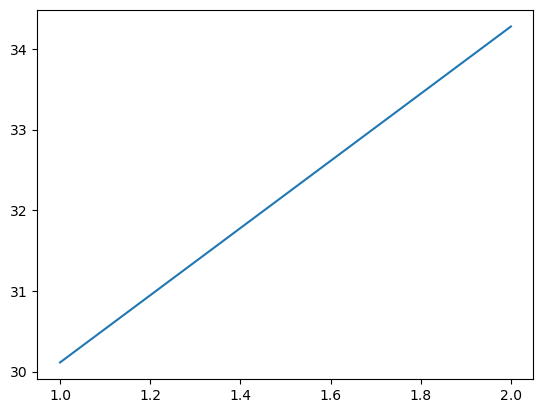

In [52]:
import matplotlib.pyplot as plt
plt.plot(result)